<a href="https://colab.research.google.com/github/ucfilho/optim_raianars/blob/master/ANN_DE_set_11_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from scipy import optimize
import time
import matplotlib.pyplot as plt

In [2]:
# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/ucfilho/optim_raianars/ #clonar do Github
%cd optim_raianars
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

start = time.time()
"the code you want to test stays here"
print("tempo=",start)

fatal: destination path 'optim_raianars' already exists and is not an empty directory.
/content/optim_raianars
Hello world
I'm evolving!!!

tempo= 1568257996.9371154


In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def normatize(x,w):
    strings=list(x)
    for featur in strings:
        max_feat=w[featur].max()
        min_feat=w[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x


# normatize funcion
def original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x

In [0]:
X_NOME=['DI RELATIVO','FRAC Its','VELOC FOBJ',
        'VELOC X','DELTA FOBJ','DELTA VX']
Y_NOME=['NP','F','CR']
ARQ_X='X_DAT_set_11_2019.csv'
X=pd.read_csv(ARQ_X)
X=X[X_NOME]
ARQ_Y='Y_DAT_set_11_2019.csv'
Y=pd.read_csv(ARQ_Y)
Y=Y[Y_NOME]
X_train= X.sample(frac =.7,random_state = 2)  
Y_train= Y.sample(frac =.7,random_state = 2)
X_test = X.loc[~X.index.isin(X_train.index), :]
Y_test = Y.loc[~Y.index.isin(Y_train.index), :]  
y_old=Y_train.loc[Y_train['NP']==Y_train['NP'],['CR']].values
y_total=Y['CR']
y_total=pd.DataFrame(y_total)
y_total.columns = ["y_old"]
Y_train=normatize(Y_train,Y)
X_train=normatize(X_train,X)


In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# tansig function
def tansig(x,deriv=False):
    if(deriv==True):
        return (1-x*x)
    return 2/(1+np.exp(-2*x))-1

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def normatize(x,w):
    # intervalo -1 a 1
    a=-1
    b=1
    strings=list(x)
    for featur in strings:
        max_feat=w[featur].max()
        min_feat=w[featur].min()
        x[featur]=a+(x[featur]-min_feat)*(b-a)/(max_feat-min_feat)
    return x


# normatize funcion
def original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    a=-1
    b=1
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=(x[featur]-a)*(max_feat-min_feat)/(b-a)+min_feat
    return x

In [0]:
# neural network treina
def neural_treina(X_train,Y_train,W):
  Neuron_input=6
  Neuron_hidden=5
  Neuron_output=1
  X_train=X_train.loc[X_train['VELOC X']==X_train['VELOC X'],X_NOME].values
  y=Y_train.loc[Y_train['NP']==Y_train['NP'],['CR']].values 
  Num=len(W)
  syn0=np.zeros((Neuron_input,Neuron_hidden))
  N0=Neuron_input*Neuron_hidden
  N1=Neuron_hidden*Neuron_output
  syn1=np.zeros((Neuron_hidden,Neuron_output))
  k=-1
  for i in range(Neuron_input):
    for j in range(Neuron_hidden):
      k=k+1
      syn0[i,j]=W[k]
 
  for i in range(Neuron_hidden):
    for j in range(Neuron_output):
      k=k+1
      syn1[i,j]=W[k]
  l0 = X_train
  numOfRows = np.size(l0, 0)
  numOfColumns = np.size(l0, 1)


  #l1 = sigmoid(np.dot(l0,syn0))
  l1 = sigmoid(np.dot(l0,syn0))
  l2 = purelin(np.dot(l1,syn1))
  l2_error = y - l2
  fobs=np.mean(np.abs(l2_error))
  return fobs

In [0]:
# neural network treina
def neural_uso(X_train,W):
  
  X_train=X_train.loc[X_train['VELOC X']==X_train['VELOC X'],X_NOME].values
  Neuron_input=6
  Neuron_hidden=5
  Neuron_output=1
  Num=len(W)
  syn0=np.zeros((Neuron_input,Neuron_hidden))
  syn1=np.zeros((Neuron_hidden,Neuron_output))
  k=-1
  for i in range(Neuron_input):
    for j in range(Neuron_hidden):
      k=k+1
      syn0[i,j]=W[k]

  for i in range(Neuron_hidden):
    for j in range(Neuron_output):
      k=k+1
      syn1[i,j]=W[k]

  l0 = X_train
  l1 = sigmoid(np.dot(l0,syn0))
  #l1 = tansig(np.dot(l0,syn0))
  l2 = purelin(np.dot(l1,syn1))
  y_calc=np.reshape(l2,len(l2))
  
  return y_calc

In [0]:
'''funcao do DE'''
def function(x):
  global X_train,Y_train
  fobs=neural_treina(X_train,Y_train,x)
  return fobs

In [0]:
Neuron_input=6
Neuron_hidden=5
Neuron_output=1
N0=Neuron_input*Neuron_hidden
N1=Neuron_hidden*Neuron_output
Num=N0+N1
bounds = [(-5, 5)]*Num
ret = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=30,recombination=0.5)

In [10]:
print(Num)
print(Y_train)

35
          NP         F        CR
41  0.250416  0.082149  0.354422
17  0.176471  0.952585  0.754712
43  0.754639  0.270279  0.212534
14  0.022493  0.541274  0.383904
44  0.000000  0.111303  0.096838
29  0.170103  0.522518  0.211862
12  0.073250  0.663797  0.541571
13  0.759450  0.110940  0.032253
0   0.711340  0.429068  0.142567
2   0.343299  0.432251  0.267322
9   0.440722  0.415615  0.267469
16  0.378271  0.441435  0.075705
37  0.903780  0.345131  0.000000
24  0.134021  0.593455  0.146601
42  0.484536  1.000000  0.012212
30  0.053196  0.000000  0.654968
32  0.250416  0.082149  0.354422
1   0.033617  0.177765  0.102638
23  0.675258  0.386297  0.029157
25  0.444885  0.322947  1.000000
27  0.298032  0.254750  0.443698
19  0.033617  0.177765  0.102638
35  0.000000  0.111303  0.096838
10  1.000000  0.346325  0.010168
4   0.240699  0.354541  0.352628
6   0.134021  0.593455  0.146601
3   0.257732  0.441996  0.095435
38  0.170103  0.522518  0.211862
5   0.675258  0.386297  0.029157
33  0.4

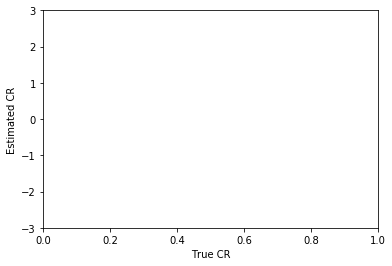

In [11]:
x=ret.x
y_calc_testa=neural_uso(X_test,x)
y_old=pd.DataFrame(y_old)
y_old.columns = ["y_old"]
y_calc_testa=pd.DataFrame({'y_calc':y_calc_testa})
y_calc_testa=original(y_calc_testa,y_total)

y_obs=Y_test.loc[Y_test['NP']==Y_test['NP'],['CR']].values
plt.scatter(y_obs,y_calc_testa)
plt.xlabel("True CR")
plt.ylabel("Estimated CR")
plt.xlim((0,1))
plt.ylim((-3,3))
plt.show()


Text(0, 0.5, 'Estimated CR')

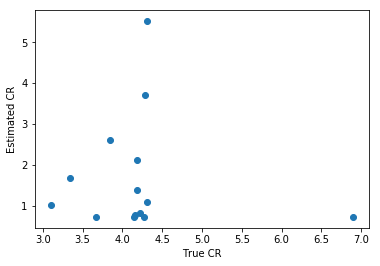

In [12]:
y_calc_testa=neural_uso(X_test,x)
y_calc_testa=pd.DataFrame({'y_calc':y_calc_testa})
#y_calc_testa=original(y_calc_testa,y_total)
#print(y_calc_testa)
y_test=pd.DataFrame(Y_test['CR'])
y_test.columns = ["y_test"]
#y_test=pd.DataFrame({'y_calc':Y_test['CR']})
#print(y_test)
y_calc_testa=original(y_calc_testa,y_total)
plt.scatter(y_calc_testa,y_test)
plt.xlabel("True CR")
plt.ylabel("Estimated CR")

In [13]:
end = time.time()
print(end - start)

453.3947513103485


In [14]:
print((end - start)/60)

7.5565791885058085
